# Directional Wells Trayectories

# Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
well_file = "Data/input/F-15/1.xml"

with open(well_file) as file:
    data = file.read()

# Data Processing

In [ ]:
data_xml = BeautifulSoup(data, 'html.parser')
params = set([str(tag.name) for tag in data_xml.find_all()])
params

In [ ]:
params = []
for tag in data_xml.find_all():
    params.append(str(tag.name))

In [ ]:
params = set(params)
params

In [ ]:
incl = data_xml.find_all('incl')
float(incl[-1].text)

In [ ]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)]       

In [ ]:
df

In [ ]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

prefix = 'Data/input/'
suffix = '/1.xml'

df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    well_file = prefix + well + suffix
    with open(well_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'html.parser')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [ ]:
df_all_wells.head()

In [ ]:
df_all_wells['Well'].unique()

In [ ]:
df_all_wells.loc[df_all_wells['Well'] == 'F-12', ['azi', 'incl', 'Well']]

In [ ]:
df_all_wells.groupby('Well')['tvd'].mean()

In [ ]:
df_all_wells['tvd-'] = df_all_wells['tvd'] * -1
df_all_wells

# Plot 3D Wells Trajectories

In [ ]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'tvd-', 'Well')
fig.show()

# Clean data (Output)

In this step, data of each well is converted into csv files.

In [ ]:
#prefix = 'Data/output/'
#wells = ['F-1 C',
#        'F-4',
#        'F-5',
#        'F-7',
#        'F-9',
#        'F-11',
#        'F-12',
#        'F-14',
#        'F-15']
#suffix = '.csv'
#
#for well in wells:
#    df = df_all_wells[df_all_wells['Well'] == well]
#    df.to_csv(prefix + well + suffix, index=False)

# Plot well F-14

In [ ]:
df_F14 = pd.read_csv('Data/output/F-14.csv')
df_F14

In [ ]:
fig_F14 = px.line_3d(df_F14, 'dispns', 'dispew', 'neg_tvd')
fig_F14

# EDA (Exploratory Data Analysis)

In [ ]:
corr = df_all_wells.corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)
fig.show()

## Plots for Categorical Variables

In [ ]:
fig_1, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_all_wells, x='Well', y='md', ax=ax)
plt.xticks(rotation = 45)
fig_1.show()

In [ ]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig_2, axes = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, axes):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()

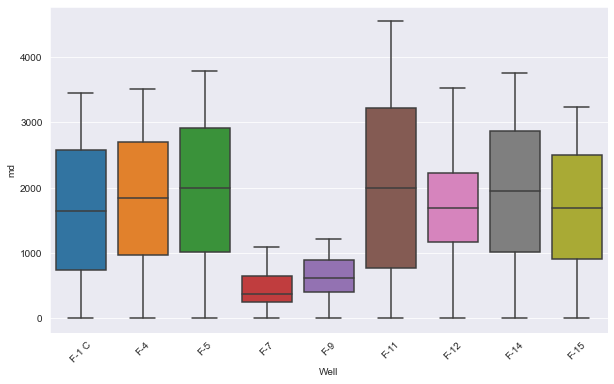

In [38]:
fig_1, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_all_wells, x='Well', y='md', ax=ax)
plt.xticks(rotation = 45)
fig_1.show()

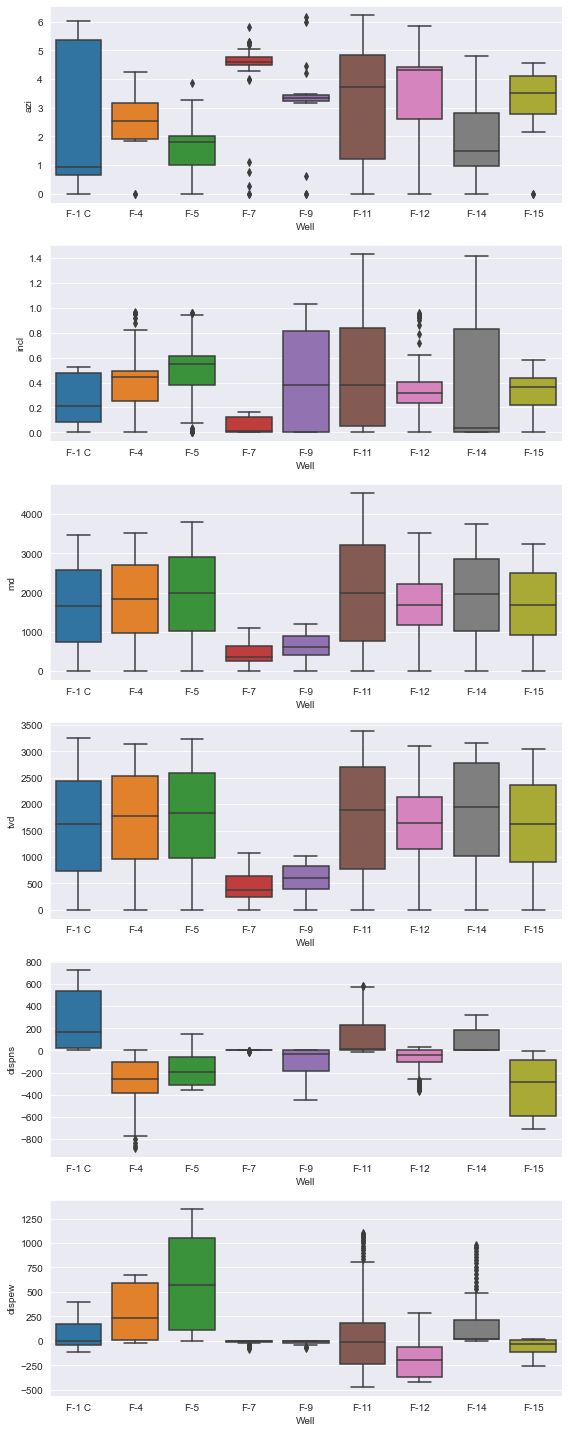

In [39]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig_2, axes = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, axes):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()